In [1]:
from transformers import GPT2Tokenizer
import pandas as pd

df = pd.read_csv('UVQuAD.csv')
df.head()

,title,context,question,answer
0,titulo,Vestibular Unicamp 2024\nResolução GR-031/2023...,Quando foi publicada a Resolução Vestibular Un...,"{'text': ['13/07/2023'], 'answer_start': []}"
1,titulo,Vestibular Unicamp 2024\nResolução GR-031/2023...,Quem é o Reitor da Universidade Estadual de Ca...,"{'text': ['Maria Luiza Moretti'], 'answer_star..."
2,titulo,Vestibular Unicamp 2024\nResolução GR-031/2023...,Qual é a finalidade da Resolução Vestibular Un...,{'text': ['Especificar os sistemas de ingresso...
3,Vagas e sistemas de ingresso à Graduação,Art. 1º Para o ano de 2024 são oferecidas 3340...,Quantas vagas regulares são oferecidas para in...,"{'text': ['3340'], 'answer_start': []}"
4,Vagas e sistemas de ingresso à Graduação,Art. 1º Para o ano de 2024 são oferecidas 3340...,Quais são os sistemas de ingresso para os curs...,"{'text': ['Vestibular Unicamp (VU) 2024', 'Edi..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     1270 non-null   object
 1   context   1270 non-null   object
 2   question  1270 non-null   object
 3   answer    1270 non-null   object
dtypes: object(4)
memory usage: 39.8+ KB


In [39]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 3.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.8 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.9/303.9 kB 6.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 17.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.1 MB/s eta 0:00:00:00:01


183


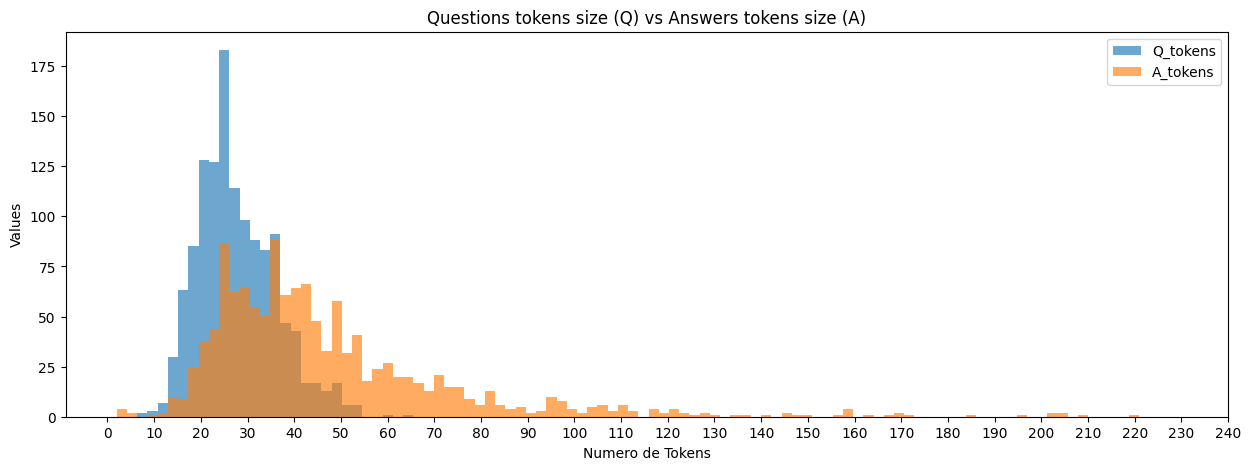

In [97]:
import matplotlib.pyplot as plt
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
data = []
for i in range(len(df)):
    data.append(
        {
            "Q_tokens" : len(tokenizer(df['question'][i])['input_ids']),
            "A_tokens" : len(tokenizer(eval(df['answer'][i])['text'][0])['input_ids'])
        }
    )
df_tokens = pd.DataFrame(data)
print(len(df_tokens.query("Q_tokens >= 24 and Q_tokens <= 26")))
df_tokens.plot(kind="hist",
               bins=100,
            #    edgecolor="white",
               alpha=0.65,
               figsize=(15, 5))
plt.xlabel('Numero de Tokens')
plt.ylabel('Values')
plt.xticks(range(0, 250, 10))
plt.title("Questions tokens size (Q) vs Answers tokens size (A)")
plt.legend()
# print()


# Compute metrics

UVQuAD

In [29]:
import pandas as pd
from unidecode import unidecode
# Dataset of grand truth
UVQuAD = pd.read_csv('../data/processed/UVQuAD.csv')
UVQuAD["answer"] = UVQuAD["answer"].apply(lambda x: eval(x))        # Mudanza de tipo no dado da coluna answer.
UVQuAD.reset_index(inplace=True)                                    # Medanza de index

UVQuAD.columns = ["id", "title", "context", "question", "answers"]   # Renomear colunas
UVQuAD["id"] = UVQuAD["id"].apply(lambda x: str(x))
UVQuAD["answers"] = UVQuAD["answers"].apply(lambda x: {"text":[unidecode(i) for i in x["text"]], "answer_start":x["answer_start"]})
UVQuAD["answers"][0]

{'text': ['13/07/2023'], 'answer_start': []}

chatGPT preditions

In [30]:
# Dataset of predictions
chatGPT_predictions = pd.read_csv('../data/processed/ChatGPT_predictions.csv')
chatGPT_predictions["id"] = chatGPT_predictions["id"].apply(lambda x: str(x))
chatGPT_predictions["prediction_text"] = chatGPT_predictions["prediction_text"].apply(lambda x: unidecode(x))

MariTalk predictions

In [31]:
mariTalk_predictions = pd.read_csv('../data/processed/MariTalk_predictions.csv')
mariTalk_predictions["id"] = mariTalk_predictions["id"].apply(lambda x: str(x))
mariTalk_predictions["prediction_text"] = mariTalk_predictions["prediction_text"].apply(lambda x: unidecode(x) if type(x) is not float else x)

## ChatGPT metrics

In [4]:
references = UVQuAD[["id", "answers"]].to_dict(orient='records')
predictions = chatGPT_predictions.to_dict(orient='records')
predictions[0]

{'id': '0',
 'prediction_text': 'A Resolucao Vestibular Unicamp 2024 foi publicada em 13/07/2023.'}

In [5]:
len(references), len(predictions)

(1270, 1270)

### EM and F1 score

In [6]:
from evaluate import load
squad_metric = load("squad")
# predictions = [{'prediction_text': '1976', 'id': '56e10a3be3433e1400422b22'}, {'prediction_text': 'Beyonce', 'id': '56d2051ce7d4791d0090260b'},  {'prediction_text': 'climate change', 'id': '5733b5344776f419006610e1'}]

results = squad_metric.compute(predictions=predictions, references=references)
results

/home/wladimir.carrillo/miniconda3/envs/chatbotenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


{'exact_match': 3.0708661417322833, 'f1': 49.81529279617546}

In [7]:
results_data = []
cont = 0
df_results = pd.DataFrame()
for i in range(len(predictions)):
    results = squad_metric.compute(predictions=[predictions[i]], references=[references[i]])
    results_data.append(results)
    df_results = pd.DataFrame(results_data)
    if cont == 20:
        cont = 0
        print(f"Result N{i}: {results}")
    else:
        cont += 1
df_results.to_csv('results/gpt_em-f1.csv', index=True)

Result N20: {'exact_match': 0.0, 'f1': 35.71428571428571}
Result N41: {'exact_match': 0.0, 'f1': 38.46153846153847}
Result N62: {'exact_match': 0.0, 'f1': 37.68115942028986}
Result N83: {'exact_match': 0.0, 'f1': 83.72093023255815}
Result N104: {'exact_match': 0.0, 'f1': 65.3061224489796}
Result N125: {'exact_match': 0.0, 'f1': 34.666666666666664}
Result N146: {'exact_match': 0.0, 'f1': 44.44444444444444}
Result N167: {'exact_match': 0.0, 'f1': 46.666666666666664}
Result N188: {'exact_match': 0.0, 'f1': 33.84615384615385}
Result N209: {'exact_match': 100.0, 'f1': 100.0}
Result N230: {'exact_match': 0.0, 'f1': 24.324324324324326}
Result N251: {'exact_match': 0.0, 'f1': 35.29411764705882}
Result N272: {'exact_match': 0.0, 'f1': 45.09803921568628}
Result N293: {'exact_match': 0.0, 'f1': 33.84615384615385}
Result N314: {'exact_match': 0.0, 'f1': 66.66666666666666}
Result N335: {'exact_match': 0.0, 'f1': 91.35802469135803}
Result N356: {'exact_match': 0.0, 'f1': 52.459016393442624}
Result N

<Axes: title={'center': 'ME vs F1 score for ChatGPT predictions'}, ylabel='Frequency'>

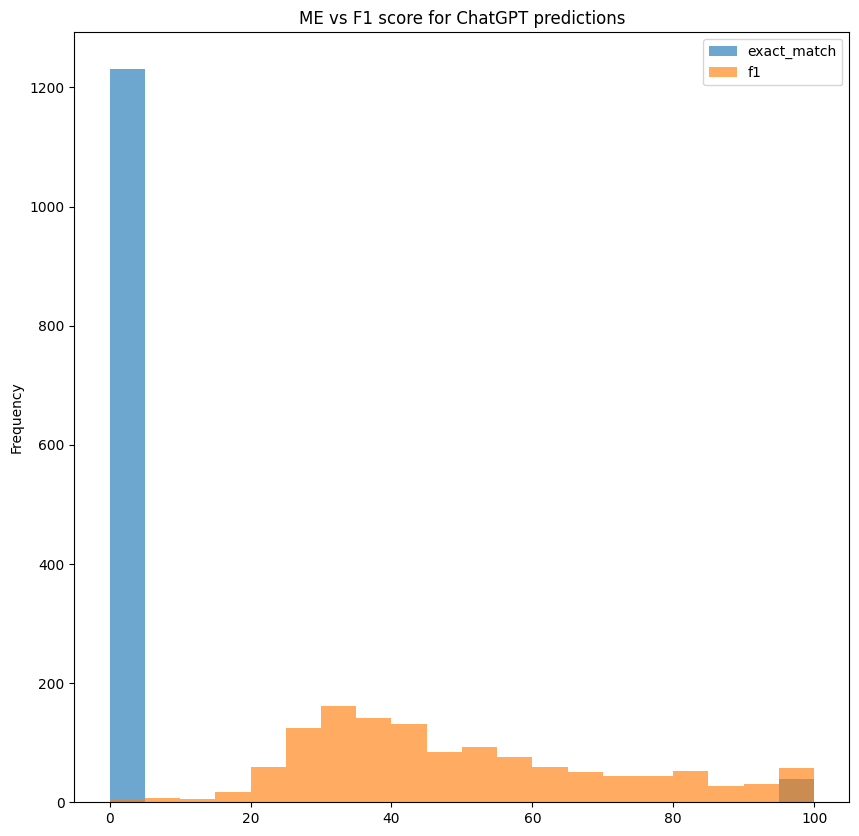

In [8]:
df_results.plot(kind="hist",bins=20, alpha=0.65, figsize=(10, 10), title="ME vs F1 score for ChatGPT predictions")

### WER on ChatGPT

In [9]:
predictions[0], references[0]

({'id': '0',
  'prediction_text': 'A Resolucao Vestibular Unicamp 2024 foi publicada em 13/07/2023.'},
 {'id': '0', 'answers': {'text': ['13/07/2023'], 'answer_start': []}})

In [10]:
new_predictions = [i["prediction_text"] for i in predictions]
new_references = [i["answers"]["text"][0] for i in references]
new_predictions[1], new_references[1]

('O Reitor em exercicio da Universidade Estadual de Campinas e Maria Luiza Moretti.',
 'Maria Luiza Moretti')

In [11]:
from evaluate import load
wer = load("wer")
wer_score = wer.compute(predictions=new_predictions, references=new_references)
print(wer_score)

1.644359464627151


In [12]:
df_wer = pd.DataFrame()
wer_data = []
count = 0

for i in range(len(new_predictions)):
    wer_score = wer.compute(predictions=[new_predictions[i]], references=[new_references[i]])
    wer_data.append({"wer_score":wer_score})
    df_wer = pd.DataFrame(wer_data)
    if count == 20:
        count = 0
        print(f"Result N{i}: {wer_score}")
    else:
        count += 1
df_wer.to_csv('results/gpt_wer.csv', index=True)

Result N20: 3.0
Result N41: 1.9130434782608696
Result N62: 2.0526315789473686
Result N83: 0.9411764705882353
Result N104: 1.375
Result N125: 3.375
Result N146: 2.357142857142857
Result N167: 1.7647058823529411
Result N188: 2.5625
Result N209: 0.08333333333333333
Result N230: 3.235294117647059
Result N251: 1.2380952380952381
Result N272: 1.3333333333333333
Result N293: 4.0
Result N314: 1.3214285714285714
Result N335: 0.2
Result N356: 1.7647058823529411
Result N377: 1.0
Result N398: 1.4666666666666666
Result N419: 0.44
Result N440: 2.8823529411764706
Result N461: 4.583333333333333
Result N482: 4.545454545454546
Result N503: 3.357142857142857
Result N524: 3.909090909090909
Result N545: 4.5
Result N566: 4.083333333333333
Result N587: 3.9166666666666665
Result N608: 3.769230769230769
Result N629: 0.6153846153846154
Result N650: 3.533333333333333
Result N671: 4.2727272727272725
Result N692: 0.8070175438596491
Result N713: 1.75
Result N734: 1.225
Result N755: 1.3888888888888888
Result N776: 2

<Axes: title={'center': 'WER for ChatGPT predictions'}, ylabel='Frequency'>

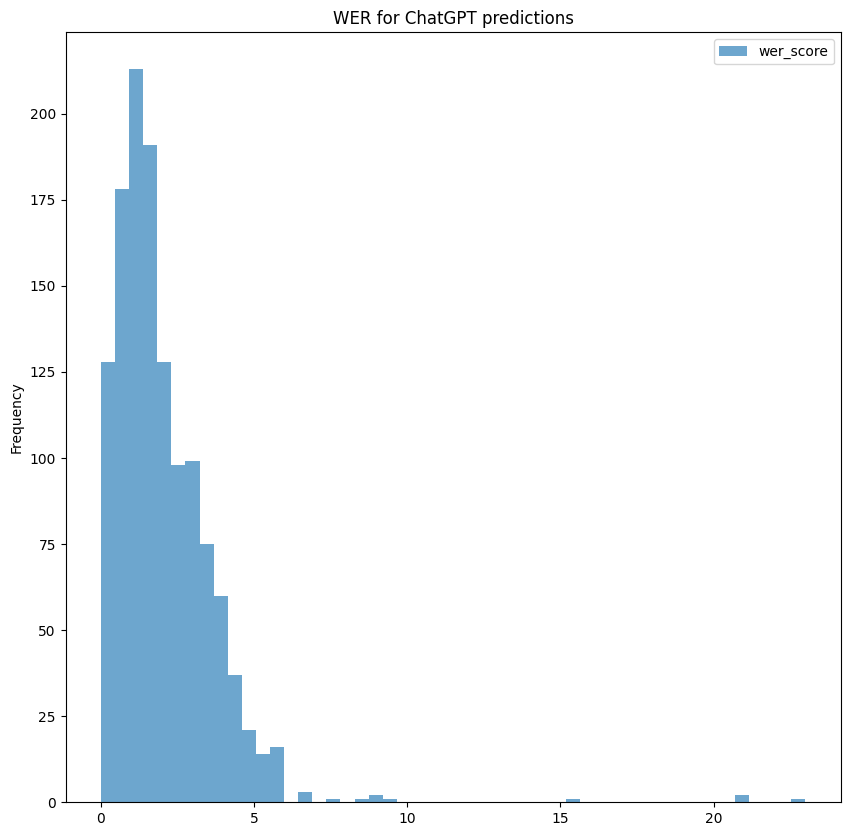

In [13]:
df_wer.plot(kind="hist",bins=50, alpha=0.65, figsize=(10, 10), title="WER for ChatGPT predictions")

## MariTalk metrics

In [32]:
references = UVQuAD[["id", "answers"]].to_dict(orient='records')
predictions = mariTalk_predictions.to_dict(orient='records')
predictions[0]

{'id': '0',
 'prediction_text': 'A Resolucao Vestibular Unicamp 2024 foi publicada em 13 de julho de 2023.'}

In [33]:
len(references), len(predictions)

(1270, 1270)

### EM and F1 score

In [34]:
from evaluate import load
squad_metric = load("squad")
# predictions = [{'prediction_text': '1976', 'id': '56e10a3be3433e1400422b22'}, {'prediction_text': 'Beyonce', 'id': '56d2051ce7d4791d0090260b'},  {'prediction_text': 'climate change', 'id': '5733b5344776f419006610e1'}]

results = squad_metric.compute(predictions=predictions, references=references)
results

{'exact_match': 4.094488188976378, 'f1': 37.27092615989766}

In [35]:
predictions[28]

{'id': '28', 'prediction_text': nan}

In [36]:
results_data = []
cont = 0
df_results = pd.DataFrame()
for i in range(len(predictions)):
    if type(predictions[i]["prediction_text"]) is not float:
        results = squad_metric.compute(predictions=[predictions[i]], references=[references[i]])
    else:
        results = {'exact_match': 0.0, 'f1': 0.0}
    results_data.append(results)
    df_results = pd.DataFrame(results_data)
    if cont == 20:
        cont = 0
        print(f"Result N{i}: {results}")
    else:
        cont += 1
df_results.to_csv('results/mari_em-f1.csv', index=True)

Result N20: {'exact_match': 0.0, 'f1': 91.66666666666666}
Result N41: {'exact_match': 0.0, 'f1': 39.21568627450981}
Result N62: {'exact_match': 0.0, 'f1': 45.16129032258064}
Result N83: {'exact_match': 0.0, 'f1': 22.857142857142858}
Result N104: {'exact_match': 0.0, 'f1': 94.11764705882352}
Result N125: {'exact_match': 0.0, 'f1': 59.45945945945946}
Result N146: {'exact_match': 0.0, 'f1': 17.857142857142854}
Result N167: {'exact_match': 0.0, 'f1': 21.875}
Result N188: {'exact_match': 0.0, 'f1': 23.25581395348837}
Result N209: {'exact_match': 0.0, 'f1': 20.0}
Result N230: {'exact_match': 0.0, 'f1': 22.857142857142858}
Result N251: {'exact_match': 0.0, 'f1': 50.000000000000014}
Result N272: {'exact_match': 0.0, 'f1': 59.374999999999986}
Result N293: {'exact_match': 0.0, 'f1': 88.8888888888889}
Result N314: {'exact_match': 0.0, 'f1': 69.84126984126985}
Result N335: {'exact_match': 0.0, 'f1': 51.85185185185186}
Result N356: {'exact_match': 0.0, 'f1': 33.333333333333336}
Result N377: {'exact

<Axes: title={'center': 'ME vs F1 score for MariTalk predictions'}, ylabel='Frequency'>

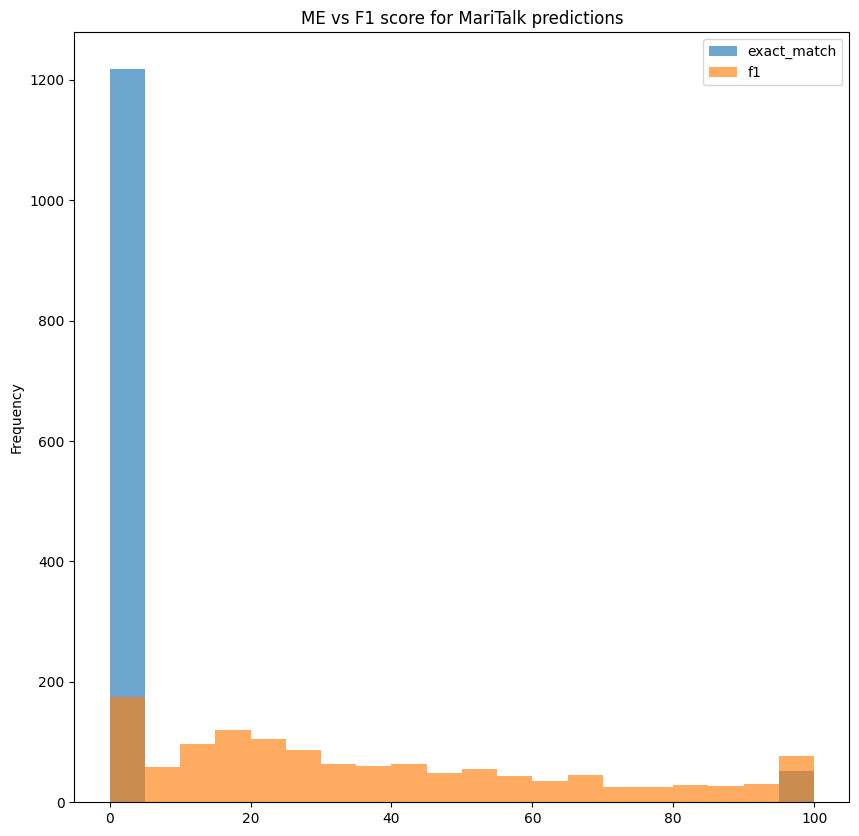

In [19]:
df_results.plot(kind="hist",bins=20, alpha=0.65, figsize=(10, 10), title= "ME vs F1 score for MariTalk predictions")

### WER on MariTalk

In [20]:
predictions[0], references[0]

({'id': '0',
  'prediction_text': 'A Resolucao Vestibular Unicamp 2024 foi publicada em 13 de julho de 2023.'},
 {'id': '0', 'answers': {'text': ['13/07/2023'], 'answer_start': []}})

In [21]:
new_predictions = [i["prediction_text"] for i in predictions]
new_references = [i["answers"]["text"][0] for i in references]
new_predictions[1], new_references[1]

('Maria Luiza Moretti e a Reitora em exercicio da Universidade Estadual de Campinas.',
 'Maria Luiza Moretti')

In [22]:
from evaluate import load
wer = load("wer")
wer_score = wer.compute(predictions=new_predictions, references=new_references)
print(wer_score)

1.3227065204666952


In [23]:
df_wer = pd.DataFrame()
wer_data = []
count = 0

for i in range(len(new_predictions)):
    if type(predictions[i]["prediction_text"]) is not float:
        wer_score = wer.compute(predictions=[new_predictions[i]], references=[new_references[i]])
    else:
        wer_score = 0.0
    wer_data.append({"wer":wer_score})
    df_wer = pd.DataFrame(wer_data)
    if count == 20:
        count = 0
        print(f"Result N{i}: {wer_score}")
    else:
        count += 1
df_wer.to_csv('results/mari_wer.csv', index=True)

Result N20: 0.16666666666666666
Result N41: 0.782608695652174
Result N62: 1.736842105263158
Result N83: 0.9411764705882353
Result N104: 0.25
Result N125: 1.125
Result N146: 3.142857142857143
Result N167: 2.2941176470588234
Result N188: 1.6875
Result N209: 4.5
Result N230: 3.1176470588235294
Result N251: 0.7142857142857143
Result N272: 0.7435897435897436
Result N293: 0.25
Result N314: 0.5
Result N335: 0.625
Result N356: 1.0
Result N377: 1.0
Result N398: 0.6666666666666666
Result N419: 1.44
Result N440: 1.0
Result N461: 3.5833333333333335
Result N482: 1.0909090909090908
Result N503: 1.0
Result N524: 4.181818181818182
Result N545: 1.0
Result N566: 2.75
Result N587: 3.25
Result N608: 1.0
Result N629: 1.0
Result N650: 1.3333333333333333
Result N671: 1.0
Result N692: 1.0
Result N713: 1.7142857142857142
Result N734: 0.975
Result N755: 1.3055555555555556
Result N776: 1.0
Result N797: 1.0
Result N818: 2.3
Result N839: 0.3333333333333333
Result N860: 1.6428571428571428
Result N881: 2.92857142857

<Axes: title={'center': 'WER for MariTalk predictions'}, ylabel='Frequency'>

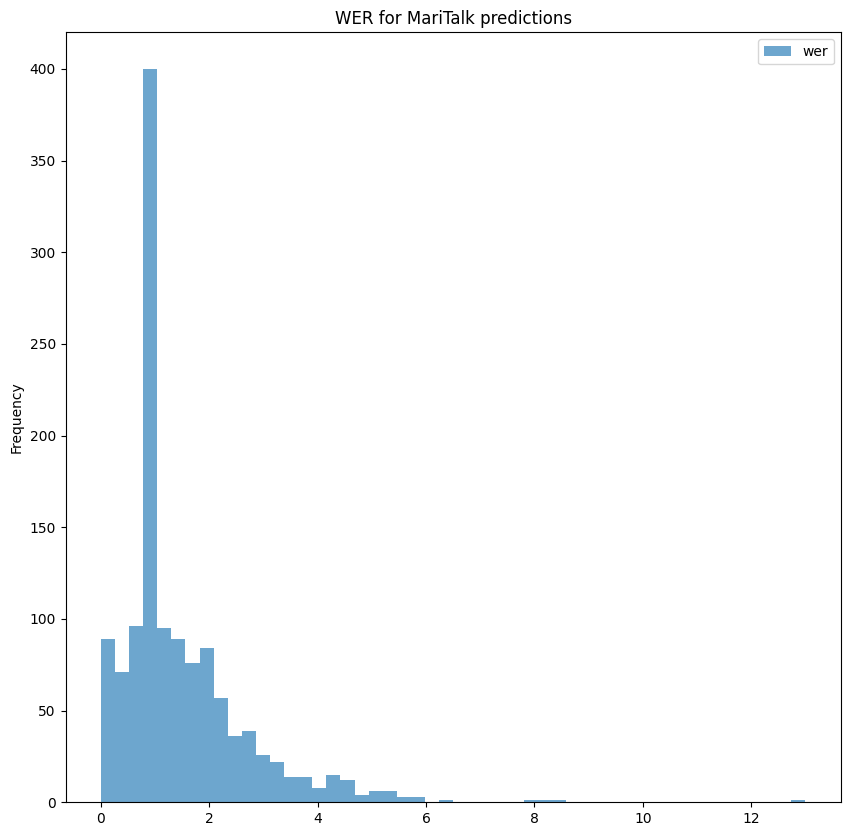

In [24]:
df_wer.plot(kind="hist",bins=50, alpha=0.65, figsize=(10, 10), title="WER for MariTalk predictions")

Tabela de resultados

In [25]:
import pandas as pd

UVQuAD = pd.read_csv('../data/processed/UVQuAD.csv')
chatGPT_predictions = pd.read_csv('../data/processed/ChatGPT_predictions.csv')
mariTalk_predictions = pd.read_csv('../data/processed/MariTalk_predictions.csv')

gpt_em_f1 = pd.read_csv('results/gpt_em-f1.csv')
gpt_wer = pd.read_csv('results/gpt_wer.csv')
mari_em_f1 = pd.read_csv('results/mari_em-f1.csv')
mari_wer = pd.read_csv('results/mari_wer.csv')

In [26]:

mari_em_f1, mari_wer

(      Unnamed: 0  exact_match         f1
 0              0          0.0   0.000000
 1              1          0.0  40.000000
 2              2          0.0  73.333333
 3              3          0.0  50.000000
 4              4          0.0  73.469388
 ...          ...          ...        ...
 1265        1265          0.0   0.000000
 1266        1266          0.0  47.826087
 1267        1267          0.0  53.571429
 1268        1268          0.0  35.087719
 1269        1269          0.0  75.000000
 
 [1270 rows x 3 columns],
       Unnamed: 0        wer
 0              0  13.000000
 1              1   3.333333
 2              2   1.000000
 3              3   2.000000
 4              4   5.750000
 ...          ...        ...
 1265        1265   1.000000
 1266        1266   1.857143
 1267        1267   0.857143
 1268        1268   1.333333
 1269        1269   0.416667
 
 [1270 rows x 2 columns])

In [27]:
index = [83, 209, 440, 1154, 1217]

In [28]:
data_gpt = pd.concat([UVQuAD['question'].iloc[index],
                    chatGPT_predictions['prediction_text'].iloc[index],
                    gpt_em_f1[['exact_match', 'f1']].iloc[index],
                    gpt_wer['wer_score'].iloc[index]], axis=1)
data_mari = pd.concat([mariTalk_predictions['prediction_text'].iloc[index],
                    mari_em_f1[['exact_match', 'f1']].iloc[index],
                    mari_wer['wer'].iloc[index]], axis=1)
t = """EM:  {},
F1:  {},
WER: {}"""

data_gpt['score'] = data_gpt[['exact_match', 'f1', 'wer_score']].apply(lambda x: t.format(x[0], x[1], x[2]), axis=1)
data_mari['score'] = data_mari[['exact_match', 'f1', 'wer']].apply(lambda x: t.format(x[0], x[1], x[2]), axis=1)

results_data = pd.concat([data_gpt[['question', 'prediction_text', 'score']],
                        data_mari[['prediction_text', 'score']]], axis=1)
results_data.to_excel('results/results.xlsx', index=True)
# data_gpt[['question', 'prediction_text', 'score']].to_excel('results/gpt.xlsx', index=False)

/tmp/ipykernel_979933/236141740.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_gpt['score'] = data_gpt[['exact_match', 'f1', 'wer_score']].apply(lambda x: t.format(x[0], x[1], x[2]), axis=1)
/tmp/ipykernel_979933/236141740.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data_mari['score'] = data_mari[['exact_match', 'f1', 'wer']].apply(lambda x: t.format(x[0], x[1], x[2]), axis=1)
